### Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2

from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings("ignore")

### Load fashion_mnist dataset

In [2]:
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
cv2.imshow("1",X_train[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

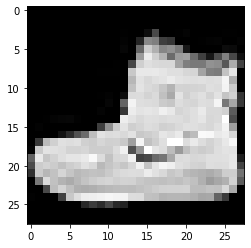

In [5]:
plt.imshow(X_train[0],cmap = 'gray')

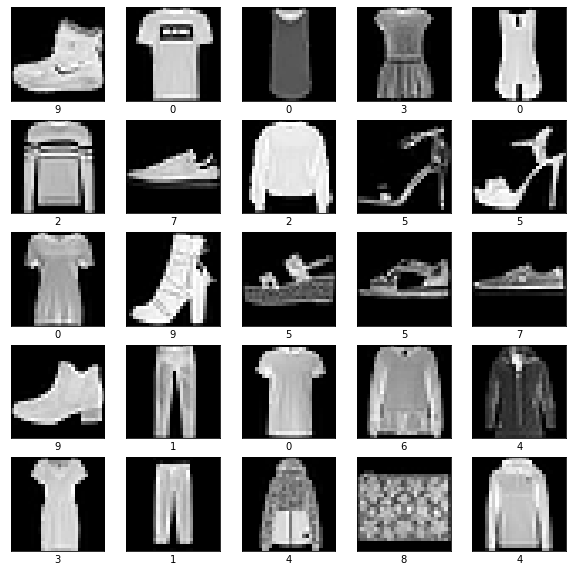

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap='gray')
   
    plt.xlabel(Y_train[i])
plt.show()

### Scale, reshape data/ onehot encode labels 

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
trainX = X_train.reshape((X_train.shape[0], 28, 28, 1))
testX = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [9]:
trainX.shape, testX.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
trainY = to_categorical(Y_train)
testY = to_categorical(Y_test)

### Create a CNN model 

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)

Epoch 1/10
1875/1875 - 17s - loss: 0.4277 - accuracy: 0.8473 - val_loss: 0.3404 - val_accuracy: 0.8772
Epoch 2/10
1875/1875 - 18s - loss: 0.2865 - accuracy: 0.8957 - val_loss: 0.2995 - val_accuracy: 0.8901
Epoch 3/10
1875/1875 - 19s - loss: 0.2433 - accuracy: 0.9103 - val_loss: 0.2801 - val_accuracy: 0.8972
Epoch 4/10
1875/1875 - 19s - loss: 0.2165 - accuracy: 0.9193 - val_loss: 0.3005 - val_accuracy: 0.8890
Epoch 5/10
1875/1875 - 19s - loss: 0.1927 - accuracy: 0.9288 - val_loss: 0.2822 - val_accuracy: 0.9015
Epoch 6/10
1875/1875 - 19s - loss: 0.1747 - accuracy: 0.9364 - val_loss: 0.2657 - val_accuracy: 0.9061
Epoch 7/10
1875/1875 - 19s - loss: 0.1582 - accuracy: 0.9413 - val_loss: 0.2680 - val_accuracy: 0.9078
Epoch 8/10
1875/1875 - 19s - loss: 0.1440 - accuracy: 0.9469 - val_loss: 0.2800 - val_accuracy: 0.9064
Epoch 9/10
1875/1875 - 25s - loss: 0.1302 - accuracy: 0.9526 - val_loss: 0.2792 - val_accuracy: 0.9080
Epoch 10/10
1875/1875 - 27s - loss: 0.1170 - accuracy: 0.9573 - val_loss:

### Analyze the model 

In [13]:
y_pred = model.predict(testX)
y_pred

array([[9.86560408e-05, 7.70342126e-07, 3.12941256e-06, ...,
        3.80229834e-03, 6.61477316e-05, 9.95120704e-01],
       [3.65866731e-06, 1.99692067e-08, 9.99799788e-01, ...,
        1.56967314e-10, 2.56379025e-07, 8.40637490e-11],
       [2.23057656e-10, 1.00000000e+00, 2.20658249e-11, ...,
        2.74348578e-12, 2.04243523e-13, 6.36277047e-15],
       ...,
       [3.86105512e-07, 8.21833541e-13, 1.47030885e-08, ...,
        5.95994720e-09, 9.99999523e-01, 3.58029648e-11],
       [8.30343155e-11, 1.00000000e+00, 2.75965154e-11, ...,
        3.21861960e-12, 6.06436423e-14, 1.67075674e-12],
       [8.20456553e-05, 1.52928769e-05, 7.06318606e-05, ...,
        1.71963517e-02, 1.78097538e-03, 6.04935012e-05]], dtype=float32)

In [14]:
test_pred=np.argmax(y_pred,axis=1)
test_y=np.argmax(np.array(testY),axis=1)

In [15]:
def plot_conf(ypred,y_test):
    cf_matrix = confusion_matrix( ypred,y_test)
    ax= plt.subplot()
    sns.heatmap(cf_matrix,annot=True,ax=ax, cmap="BuPu")
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')

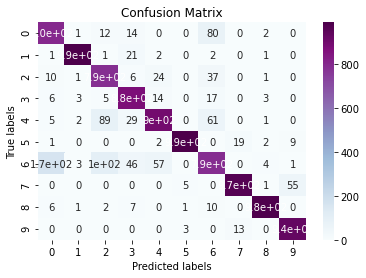

In [16]:

plot_conf(test_pred,test_y)

In [17]:
acc=accuracy_score(test_y, test_pred)
print("Accuracy: ", acc)

Accuracy:  0.9033


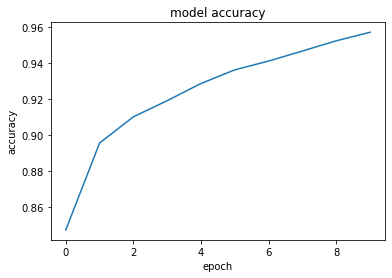

In [18]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

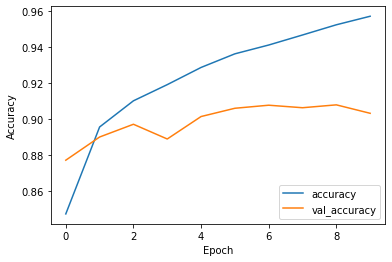

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

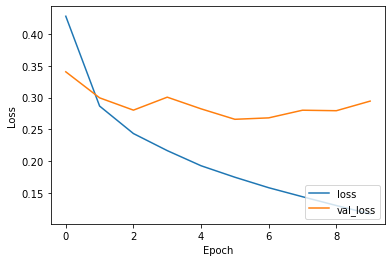

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='lower right')

### Create CNN with dropout layer for regularization 

In [21]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=2)

Epoch 1/10
1875/1875 - 31s - loss: 0.4532 - accuracy: 0.8384 - val_loss: 0.3479 - val_accuracy: 0.8739
Epoch 2/10
1875/1875 - 31s - loss: 0.3194 - accuracy: 0.8850 - val_loss: 0.3016 - val_accuracy: 0.8884
Epoch 3/10
1875/1875 - 30s - loss: 0.2798 - accuracy: 0.8961 - val_loss: 0.2855 - val_accuracy: 0.8931
Epoch 4/10
1875/1875 - 30s - loss: 0.2534 - accuracy: 0.9061 - val_loss: 0.2711 - val_accuracy: 0.9010
Epoch 5/10
1875/1875 - 31s - loss: 0.2333 - accuracy: 0.9132 - val_loss: 0.2556 - val_accuracy: 0.9081
Epoch 6/10
1875/1875 - 30s - loss: 0.2172 - accuracy: 0.9189 - val_loss: 0.2578 - val_accuracy: 0.9060
Epoch 7/10
1875/1875 - 30s - loss: 0.2050 - accuracy: 0.9232 - val_loss: 0.2570 - val_accuracy: 0.9046
Epoch 8/10
1875/1875 - 30s - loss: 0.1934 - accuracy: 0.9275 - val_loss: 0.2475 - val_accuracy: 0.9099
Epoch 9/10
1875/1875 - 30s - loss: 0.1853 - accuracy: 0.9298 - val_loss: 0.2593 - val_accuracy: 0.9067
Epoch 10/10
1875/1875 - 30s - loss: 0.1737 - accuracy: 0.9347 - val_loss:

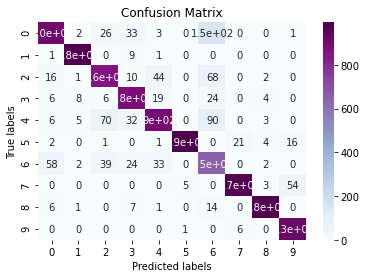

In [23]:
y_pred = model.predict(testX)
test_pred=np.argmax(y_pred,axis=1)
test_y=np.argmax(np.array(testY),axis=1)
plot_conf(test_pred,test_y)


In [24]:
acc=accuracy_score(test_y, test_pred)
print("Accuracy: ", acc)

Accuracy:  0.9055


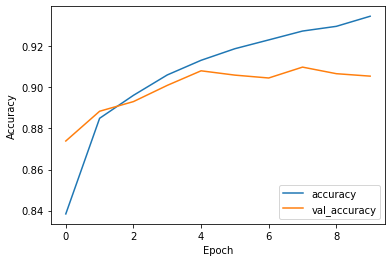

In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

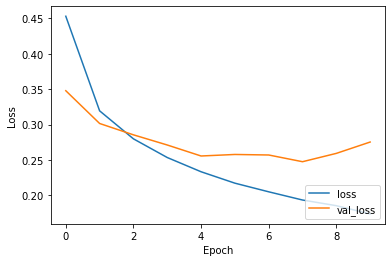

In [26]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc='lower right')